In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from nltk.corpus import stopwords
import nltk
import numpy as np
from wordcloud import WordCloud

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('drive')

Mounted at drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', usecols=['name', 'reviews.numHelpful', 'reviews.doRecommend', 'reviews.text', 'reviews.rating'])

In [ ]:
data

,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text
0,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,3,I order 3 of them and one of the item is bad q...
1,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,4,Bulk is always the less expensive way to go fo...
2,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Well they are not Duracell but for the price i...
3,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Seem to work as well as name brand batteries a...
4,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,These batteries are very long lasting the pric...
...,...,...,...,...,...
28327,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",True,0.0,5,I got 2 of these for my 8 yr old twins. My 11 ...
28328,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",True,0.0,4,I bought this for my niece for a Christmas gif...
28329,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",True,0.0,5,"Very nice for light internet browsing, keeping..."
28330,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...",True,0.0,5,This Tablet does absolutely everything I want!...


# Annotate Reviews with Sentiments

In [ ]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: -1,
                   2: -1,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {-1: 'NEGATIVE',
             0: 'NEUTRAL',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data[:20]

,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,sentiment_score,sentiment
0,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,3,I order 3 of them and one of the item is bad q...,0,NEUTRAL
1,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,4,Bulk is always the less expensive way to go fo...,1,POSITIVE
2,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Well they are not Duracell but for the price i...,1,POSITIVE
3,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Seem to work as well as name brand batteries a...,1,POSITIVE
4,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,These batteries are very long lasting the pric...,1,POSITIVE
5,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Bought a lot of batteries for Christmas and th...,1,POSITIVE
6,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,ive not had any problame with these batteries ...,1,POSITIVE
7,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,5,Well if you are looking for cheap non-recharge...,1,POSITIVE
8,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,3,These do not hold the amount of high power jui...,0,NEUTRAL
9,AmazonBasics AAA Performance Alkaline Batterie...,NaN,NaN,4,AmazonBasics AA AAA batteries have done well b...,1,POSITIVE


# Distribution of Products

In [ ]:
df = pd.DataFrame(
    data = {'name': data['name'].unique(), 'count' :data['name'].value_counts()},
    ).sort_values('count', ascending = False)

In [ ]:
#the top 10
df2 = df[:10].copy()

In [ ]:
#others
new_row = pd.DataFrame(data = {
    'name' : ['others'],
    'count' : [df['count'][10:].sum()]
})

In [ ]:
#combining top 10 with others
df2 = pd.concat([df2, new_row])

In [ ]:
df2

,name,count
AmazonBasics AAA Performance Alkaline Batteries (36 Count),AmazonBasics AAA Performance Alkaline Batterie...,8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary,AmazonBasics Nylon CD/DVD Binder (400 Capacity),3728
"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers",Amazon Echo ‚Äì White,2443
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black",Amazon Echo Show - Black,2370
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case",Echo Spot Pair Kit (Black),1676
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",Fire TV Stick Streaming Media Player Pair Kit,1425
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",AmazonBasics AA Performance Alkaline Batteries...,1212
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",AmazonBasics Ventilated Adjustable Laptop Stand,1024
"Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers",AmazonBasics Backpack for Laptops up to 17-inches,987
"All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers",AmazonBasics 11.6-Inch Laptop Sleeve,883


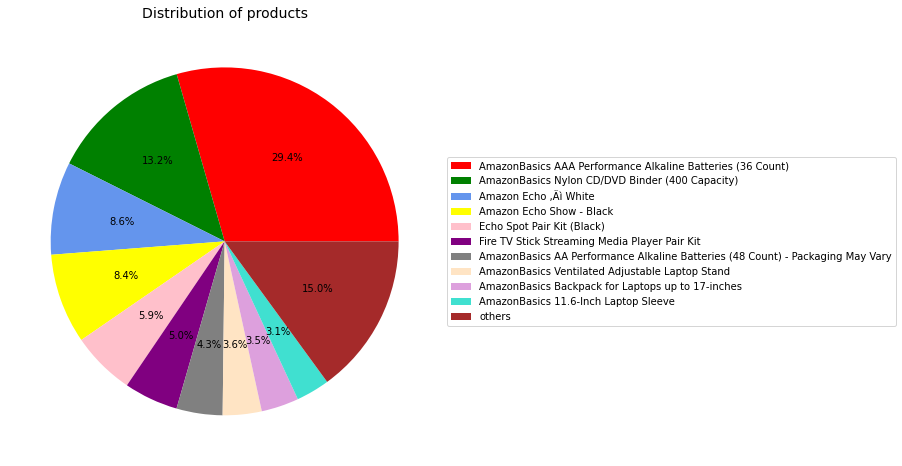

In [ ]:
# distribution of products
cs=cm.Set1(np.arange(10)/10.)

plt.figure(figsize = (8, 8))

labels = df2['name'].unique()
plt.pie(df2['count'], autopct='%0.1f%%', colors=['red','green','cornflowerblue','yellow','pink','purple','gray','bisque','plum','turquoise','brown'])

plt.title('Distribution of products', size=14, loc='center')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Distribution of Ratings

In [ ]:
# descriptive statistic of ratings
data['reviews.rating'].describe()

count    28332.000000
mean         4.514048
std          0.934957
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

In [ ]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=False)

5    19897
4     5648
3     1206
2      616
1      965
Name: reviews.rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


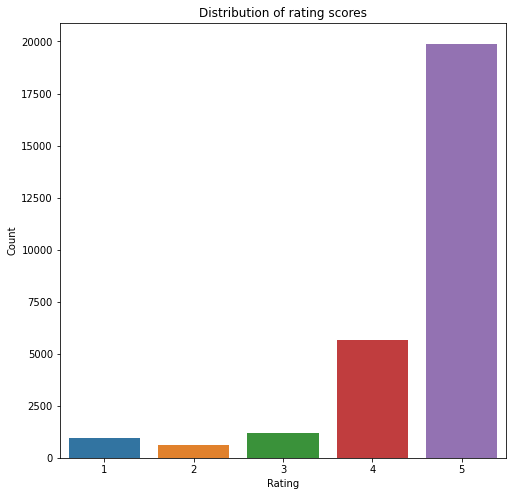

In [ ]:
# distribution of rating
plt.figure(figsize = (8, 8))
sns.countplot(data['reviews.rating'])

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Distribution of Sentiments

In [ ]:
# descriptive statistic of sentiments
data['sentiment'].describe()

count        28332
unique           3
top       POSITIVE
freq         25545
Name: sentiment, dtype: object

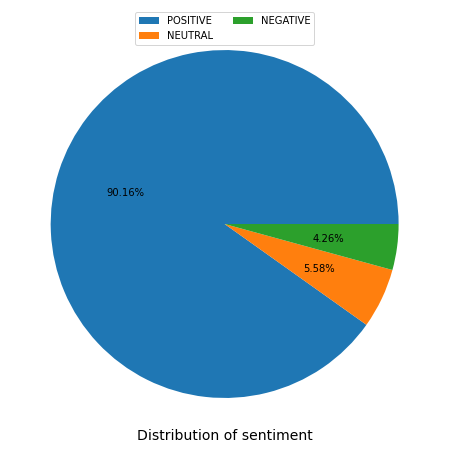

In [ ]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEUTRAL', 'NEGATIVE']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%')

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [ ]:
# descriptive statistic of number of people found review useful
data['reviews.numHelpful'].describe()

count    16115.000000
mean         0.529321
std          9.345017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [ ]:
# descriptive statistic of number of people that recommends the product
data['reviews.doRecommend'].describe()

count     16086
unique        2
top        True
freq      15353
Name: reviews.doRecommend, dtype: object

# Most Used Words for All Reviews

In [ ]:
# get all used words 
all_words = pd.Series(' '.join(data['reviews.text']).split())

In [ ]:
all_words

0               I
1           order
2               3
3              of
4            them
           ...   
735069         to
735070     anyone
735071         on
735072          a
735073    budget.
Length: 735074, dtype: object

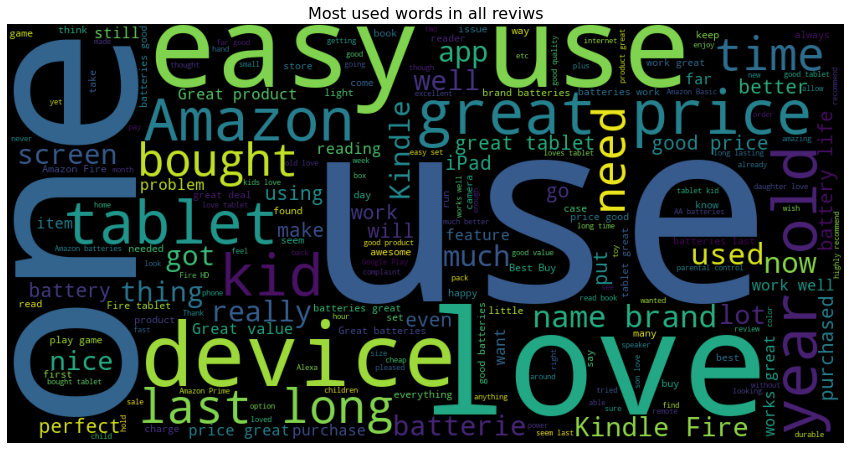

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

# Most Used Words for Positive Reviews

In [ ]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

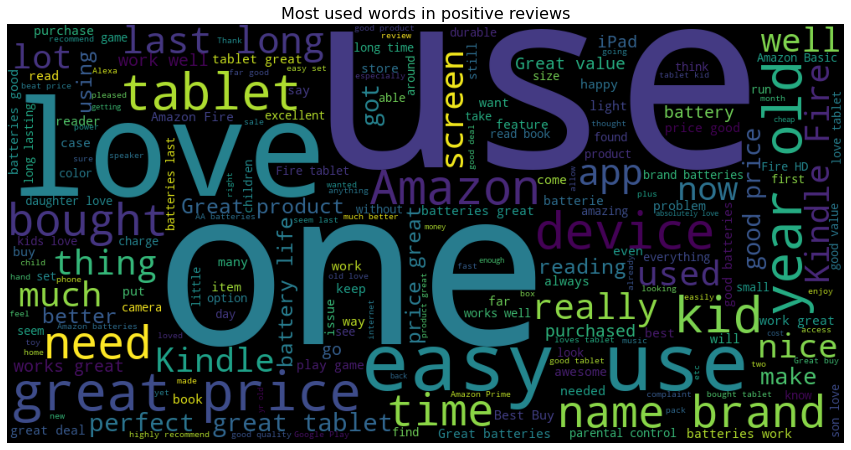

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

# Most Used Words for Neutral Reviews

In [ ]:
# get words used positive reivews 
neutralWords = pd.Series(' '.join(data[data['sentiment']=='NEUTRAL']['reviews.text']).split())

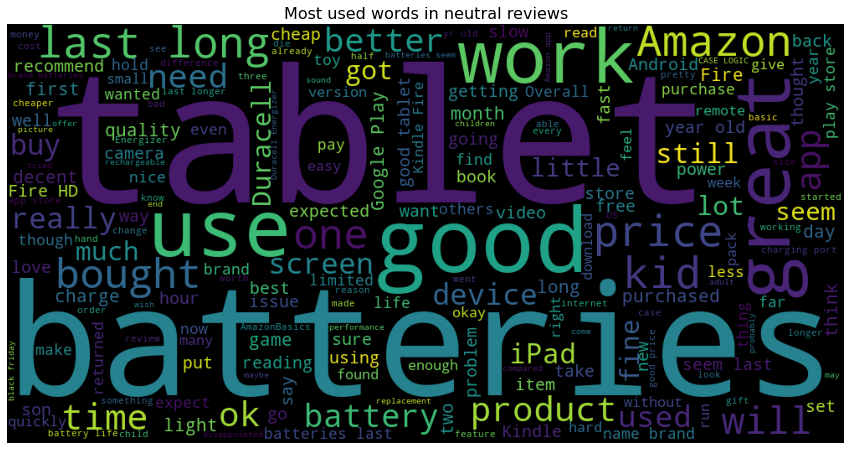

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(neutralWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in neutral reviews", size=16)

plt.axis("off")
plt.show()

# Most Used Words in Negative Reviews

In [ ]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())

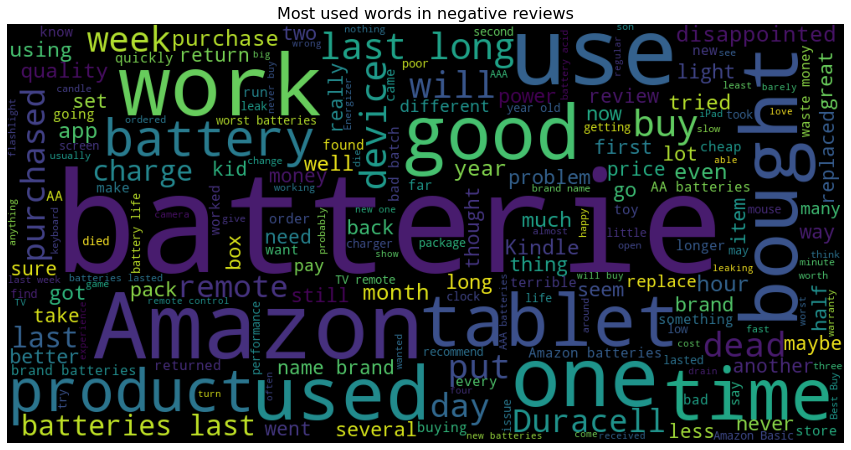

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

Make a Copy of the Data

In [ ]:
copy = data.copy()
copy = copy.drop(['name', 'reviews.text', 'sentiment_score', 'sentiment'], axis=1)

In [ ]:
#Drop null values
copy.dropna(inplace=True)
copy.reset_index(drop=True, inplace=True)
copy

,reviews.doRecommend,reviews.numHelpful,reviews.rating
0,True,0.0,4
1,True,0.0,5
2,True,0.0,5
3,True,2.0,5
4,True,0.0,5
...,...,...,...
16081,True,0.0,5
16082,True,0.0,4
16083,True,0.0,5
16084,True,0.0,5


In [ ]:
copy['reviews.doRecommend'] = copy['reviews.doRecommend'].astype(int)

In [ ]:
copy

,reviews.doRecommend,reviews.numHelpful,reviews.rating
0,1,0.0,4
1,1,0.0,5
2,1,0.0,5
3,1,2.0,5
4,1,0.0,5
...,...,...,...
16081,1,0.0,5
16082,1,0.0,4
16083,1,0.0,5
16084,1,0.0,5


count    16115.000000
mean         0.529321
std          9.345017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Heatmap')

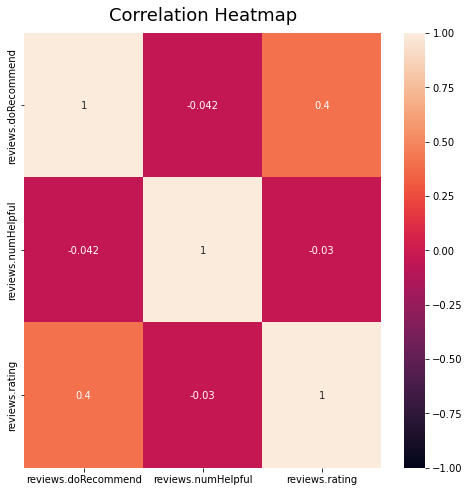

In [ ]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(copy.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)